In [1]:
%pylab inline

import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import matplotlib.patches as patches
import seaborn as sns

from __future__ import division

def fixed_aspect_ratio(ratio):
    '''
    Set a fixed aspect ratio on matplotlib plots 
    regardless of axis units
    '''
    xvals,yvals = gca().axes.get_xlim(),gca().axes.get_ylim()

    xrange = xvals[1]-xvals[0]
    yrange = yvals[1]-yvals[0]
    gca().set_aspect(ratio*(xrange/yrange), adjustable='box')

Populating the interactive namespace from numpy and matplotlib


In [2]:
data = {
    "GPU": 120,
    "CPU": 90,
    "Disks": 40,
    "Rest": 30
}

In [40]:
import pandas as pd

def pie(data, ax1=None):
    if ax1 is None:
        fig1 = plt.figure()
        ax1 = fig1.add_subplot(111, aspect='equal')
        
    pd.DataFrame(data.items(), columns=["sensor", "energy"]).sort("energy",
                                                                  ascending=False).plot(
        kind="pie", y="energy", 
                                                                  legend=False, 
                                                                  labels=None, ax=ax1,
                                                                  colors=sns.color_palette(None, len(data)))
    ax1.get_xaxis().set_visible(False)
    ax1.get_yaxis().set_visible(False)
pie(data)

/Users/pschiffmann/anaconda/envs/PowerVisualisation/lib/python2.7/site-packages/ipykernel/__main__.py:9: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


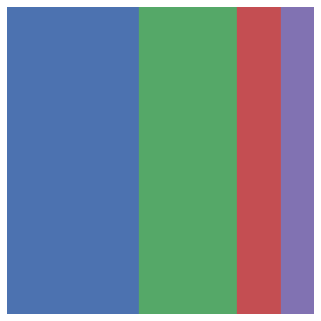

In [4]:
def square_pie(data, ax1=None):
    if ax1 is None:
        fig1 = plt.figure()
        ax1 = fig1.add_subplot(111, aspect='equal')
    ax1.get_xaxis().set_visible(False)
    ax1.get_yaxis().set_visible(False)
    
    colors = sns.color_palette(None, len(data))
    
    total = np.sum(data.values())
    last_x = 0
    
    for value, color in zip(sorted(data.values(), reverse=True), colors):
        width = value / total
        ax1.add_patch(
            patches.Rectangle(
                (last_x, 0.0), # (x,y)
                width,         # width
                1.0,           # height
                color=color
            )
        )
        
        last_x += width
        
    plt.axis('off')
        
square_pie(data)

In [5]:
def square_pie2(data, ax1=None):
    if ax1 is None:
        fig1 = plt.figure()
        ax1 = fig1.add_subplot(111, aspect='equal')
        
    ax1.get_xaxis().set_visible(False)
    ax1.get_yaxis().set_visible(False)
    
    colors = sns.color_palette(None, len(data))
    
    total = np.sum(data.values())
    last_origin = [0.0, 0.0]
    
    for ix, (value, color) in enumerate(zip(sorted(data.values(), reverse=True), colors)):
        
        if ix % 2 == 0: #horizontal max 
            width = 1.0 - last_origin[0]
            height = (value / total) / (1.0 - last_origin[0])
            
        else: #vertical max
            width = (value / total) / (1.0 - last_origin[1])
            height = 1.0 - last_origin[1]
        
        ax1.add_patch(
            patches.Rectangle(
                last_origin, # (x,y)
                width,           # width
                height,        # height
                color=color
            )
        )
            
        if ix % 2 == 0: #horizontal
            last_origin[1] += height
        else: #vertical
            last_origin[0] += width
        
        plt.axis('off')
        
square_pie2(data)

/Users/pschiffmann/anaconda/envs/PowerVisualisation/lib/python2.7/site-packages/ipykernel/__main__.py:9: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


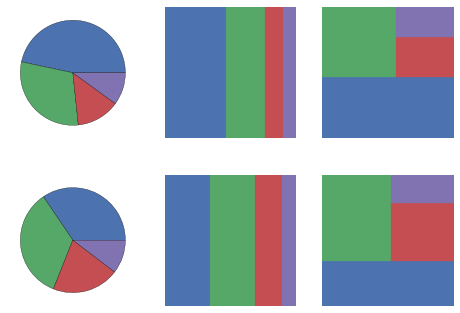

In [41]:
datasets = [{
    "GPU": 140,
    "CPU": 90,
    "Disks": 40,
    "Rest": 30
    },
    {
    "GPU": 100,
    "CPU": 100,
    "Disks": 60,
    "Rest": 30
    }]
     
f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, subplot_kw={"aspect":"equal"})

pie(datasets[0], ax1)
square_pie(datasets[0], ax2)
square_pie2(datasets[0], ax3)
pie(datasets[1], ax4)
square_pie(datasets[1], ax5)
square_pie2(datasets[1], ax6)
plt.savefig("output/report/squarepie_new.pdf")

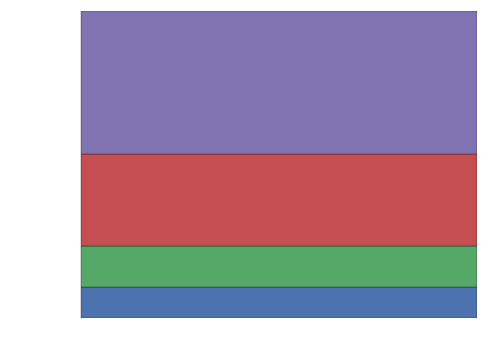

In [7]:
def bar_chart(data, ax=None):
    if ax is None:
        fig, ax = plt.subplots()
        
    colors = sns.color_palette(None, len(data))
    
    values = sorted(data.values())
    
    bar_locations = [1]
    for ix, (value, color) in enumerate(zip(values, colors)):
        ax.bar(bar_locations, value, bottom=sum(values[:ix]), color=color)
    plt.axis("off")

bar_chart(datasets[0])

In [30]:
df = pd.DataFrame(datasets)
df = df[["GPU", "CPU", "Disks", "Rest"]]

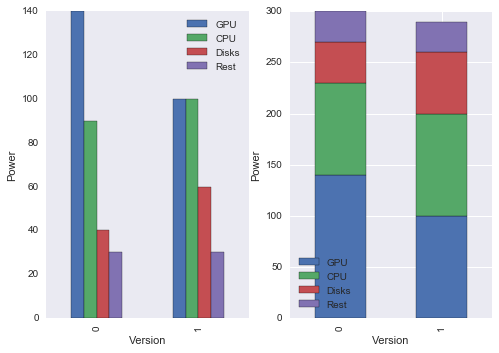

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2)

df.plot(kind="bar", grid=False, ax=ax1)
ax1.set_ylabel("Power")
ax1.set_xlabel("Version")
df.plot(kind="bar", stacked=True, ax=ax2)
ax2.set_ylabel("Power")
ax2.set_xlabel("Version")

plt.savefig("output/report/squarepie_traditional.pdf", format="pdf")

(<matplotlib.figure.Figure at 0x1133b40d0>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x114fef250>,
         <matplotlib.axes._subplots.AxesSubplot object at 0x11547c3d0>]], dtype=object))

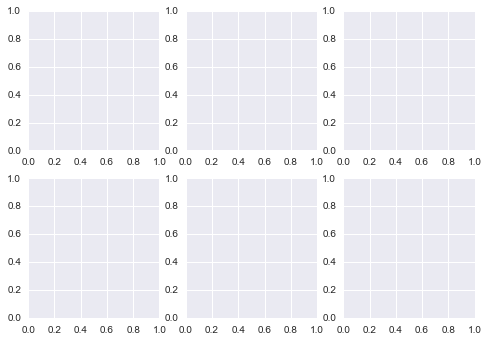

In [15]:
plt.subplots(2,3)